ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


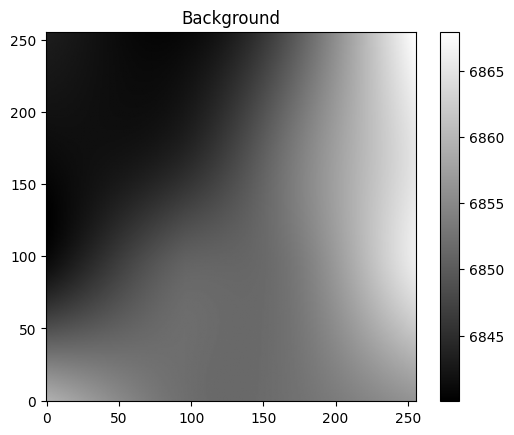

Number of sources detected: 69


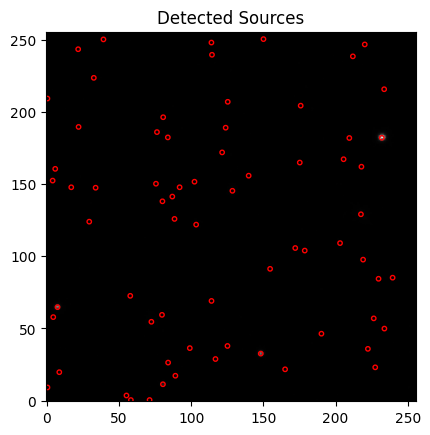

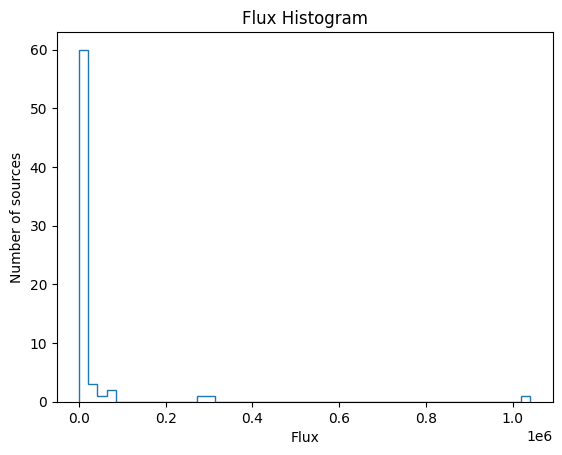

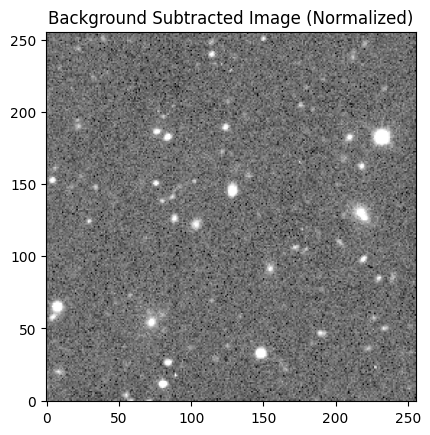

In [10]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import sep
from astropy.io import fits
from astropy.visualization import simple_norm

# Step 2: Load the image using astropy.io.fits
with fits.open('image.fits') as hdulist:  # Use your actual filename
    data = hdulist[0].data.astype(np.float32)  # Convert to float32 for SEP

# Step 3: Background subtraction
bkg = sep.Background(data)
data_sub = data - bkg.back()

# Plot background
plt.imshow(bkg.back(), cmap='gray', origin='lower')
plt.title('Background')
plt.colorbar()
plt.savefig("background.png")  # Save figure 1
plt.show()

# Step 4: Source extraction
objects = sep.extract(data_sub, thresh=1.5, err=bkg.globalrms)
print("Number of sources detected:", len(objects))

# Step 5: Plot detected sources
plt.imshow(data_sub, cmap='gray', origin='lower')
plt.scatter(objects['x'], objects['y'], s=10, edgecolor='red', facecolor='none')
plt.title("Detected Sources")
plt.savefig("detected_sources.png")  # Save figure 2
plt.show()

# Step 6: Plot flux histogram
fluxes = objects['flux']
plt.hist(fluxes, bins=50, histtype='step')
plt.xlabel('Flux')
plt.ylabel('Number of sources')
plt.title('Flux Histogram')
plt.savefig("flux_histogram.png")  # Save figure 3
plt.show()

# Step 7: Display image with better scaling using simple_norm
norm = simple_norm(data_sub, 'sqrt', percent=99)
plt.imshow(data_sub, cmap='gray', norm=norm, origin='lower')
plt.title('Background Subtracted Image (Normalized)')
plt.savefig("normalized_image.png")  # Save figure 4
plt.show()
